## Load

In [124]:
# Libraries
import random
import textwrap
import pickle 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Image

%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('max_colwidth', 300)
pd.set_option('max_columns', 100)

## Workflow

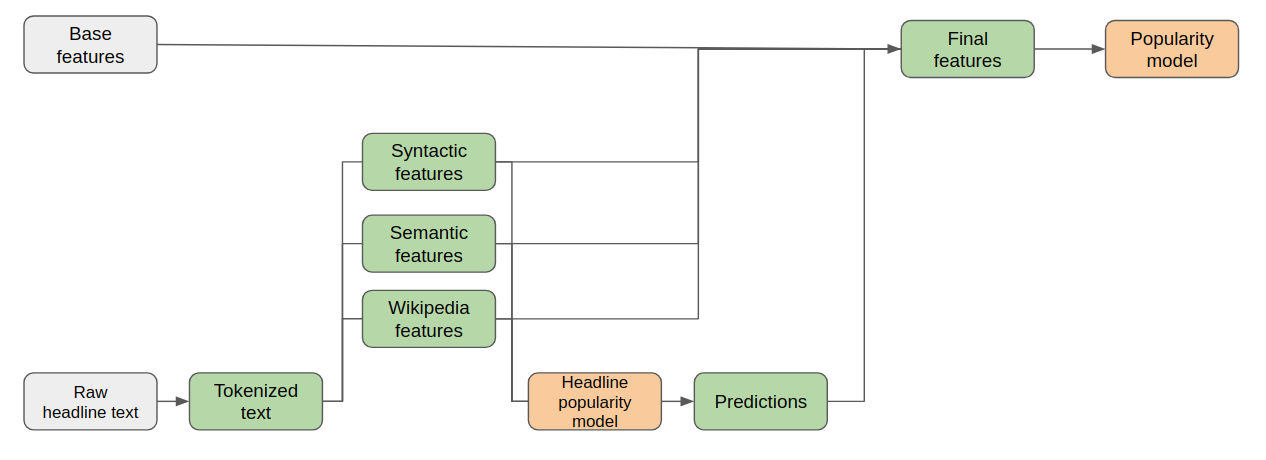

In [126]:
Image(filename='../nlp_pipeline.png') 

## Sample articles

In [2]:
dataset_path = '../Datasets/OnlineNewsPopularity-Mashable/final_dataset.csv'

In [3]:
df = pd.read_csv(dataset_path)

In [4]:
def print_article(mash_article_content):
    i = random.randint(0, len(mash_article_content))
    headline = mash_article_content.iloc[i, :]['title']
    text = mash_article_content.iloc[i, :]['text']
    shares = mash_article_content.iloc[i, :]['shares']
    display_text = '\n\n'
    display_text += headline.title()
    display_text += '\n'
    display_text += '_' * 70
    display_text += '\n\n'
    display_text += '\n'.join(textwrap.wrap(text))[:1000]
    display_text += '\n\nShares: {}'.format(shares)
    print(display_text)

In [132]:
print_article(df)



Fired Employee Beheads Coworker At Oklahoma Plant, Police Say
______________________________________________________________________

   OKLAHOMA CITY — A man fired from an Oklahoma food processing plant
beheaded a woman with a knife and was attacking another worker when he
was shot and wounded by a company official, police said Friday. Moore
Police Sgt. Jeremy Lewis says police are waiting until the 30-year-old
man is conscious to arrest him in Thursday's attack and have asked the
FBI to help investigate after co-workers at Vaughan Foods told
authorities that he recently started trying to convert several
employees to Islam. Lewis identified the man as Alton Nolen. Nolen
stabbed Colleen Hufford, 54, severing her head, Lewis said. "Yes, she
was beheaded," Lewis told The Associated Press before a Friday news
conference. Lewis said Nolen then stabbed Traci Johnson, 43, a number
of times before being shot by Mark Vaughan, a reserve sheriff's deputy
and the company's chief operating offic

## Base features

In [6]:
base_features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']

                             Base features

```
     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and
                                       the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the
                                       content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles
                                       published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the
                                       content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in
                                       Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in
                                       Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in
                                       Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral
                                       tokens
    49. rate_negative_words:           Rate of negative words among non-neutral
                                       tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)
```

## Feature exploration

### Feature correlation with target labels

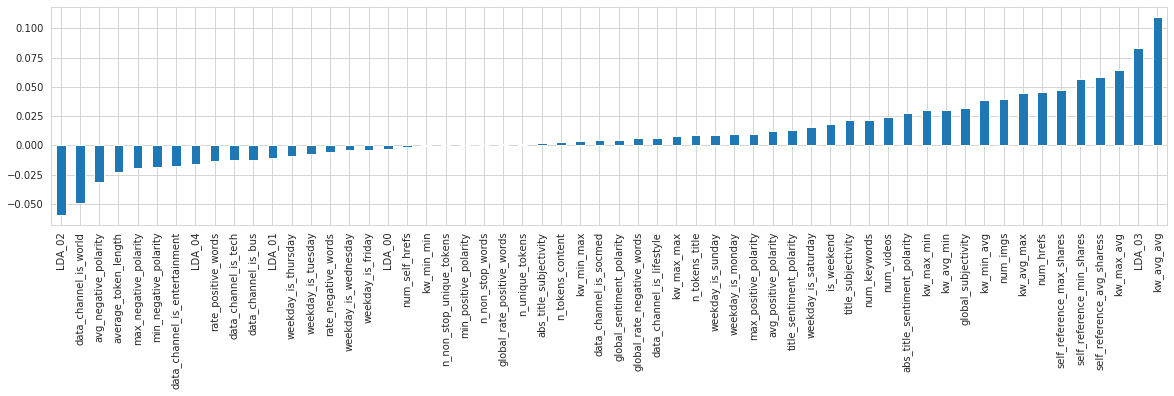

In [7]:
corr = df[base_features].corr()
share_corr = corr.loc['shares'].sort_values(ascending=True).drop('shares')

fig, ax = plt.subplots(figsize=(20, 4))
share_corr.plot(ax=ax, kind='bar')

### Feature inter-correlation

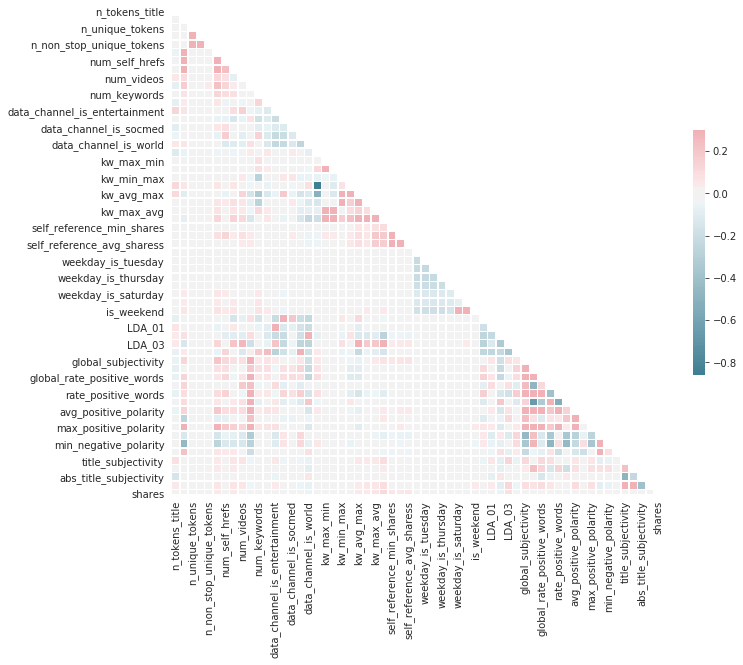

In [96]:
corr = df[base_features + ['shares']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Day of week variation

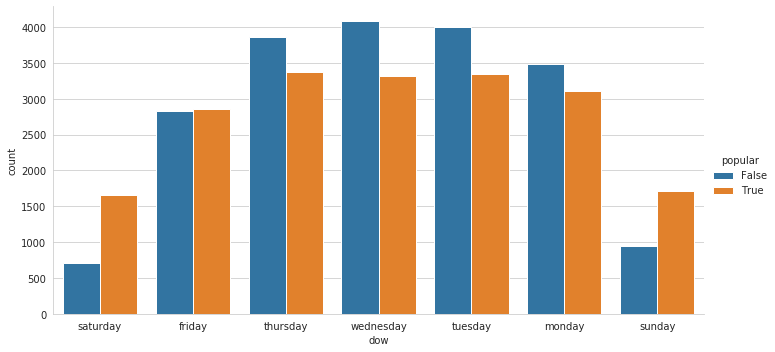

In [51]:
dow_cols = ['weekday_is_sunday',
            'weekday_is_monday',
            'weekday_is_tuesday',
            'weekday_is_wednesday',
            'weekday_is_thursday',
            'weekday_is_friday',
            'weekday_is_saturday',]

dow = (
    df
    [['title'] + dow_cols + ['shares']]
    .assign(popular = lambda x: x['shares'] > 1400)
    .drop(['shares'], axis=1)
    .groupby(by=dow_cols + ['popular'])
    .agg({'title': 'count'})
    .reset_index()
)

def get_dow(row):
    for col in dow_cols:
        if row[col] == 1:
            return col.split('_')[2]
    return

dow['dow'] = dow.apply(get_dow, axis=1)
dow = dow[['dow', 'popular', 'title']].rename(columns={'title': 'count'})
sns.catplot(x='dow', y='count', hue='popular', data=dow, kind='bar', aspect=2)

## Training

In [70]:
# Label is positive if shares > 1400
df['popular'] = df['shares'] > 1400

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score

In [72]:
# Base features
base_features = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']


# Headline features
syntactic_features = ['total_tokens', 'avg_token_len', 'title_case_tokens', 
                      'upper_case_tokens', 'exclamation_token', 'question_mark_token', 
                      'quote_mark_token']
semantic_features = ['three_consec_nouns', 'noun_percentage', 'proper_noun_percentage', 
                     'verb_percentage' ,'adverb_percentage', 'adjective_percentage', 
                     'interjection', 'non_stop_percentage']
wiki_features = ['wiki_score']

# Final features
final_features = base_features + syntactic_features + semantic_features + wiki_features
label = 'popular'

In [73]:
X = df[final_features]
y = df[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [74]:
# Initialize classifiers
clf_LR = LogisticRegression(random_state=42)
parameters_LR = {
    "penalty": ['l1','l2'],
    "C": [0.1, 0.5, 1., 2., 2.5, 5]
}

clf_RF = RandomForestClassifier(random_state=42)
parameters_RF = {
    "n_estimators": [10, 20, 50, 100, 250],
    'max_depth': [2, 4, 6, 8, 10]
}

clf_AD = AdaBoostClassifier(random_state=42)
parameters_ADA = {
    "n_estimators": [50, 100,200,300],
    "learning_rate": [0.1, 0.5, 1]
}

clf_GB = GradientBoostingClassifier(random_state=42)
parameters_GB = {
    "n_estimators": [50, 100,200,300],
    "learning_rate": [0.1, 0.5, 1]
}

classifiers = [clf_LR, clf_RF, clf_AD, clf_GB]
parameters = [parameters_LR, parameters_RF, parameters_ADA, parameters_GB]

In [75]:
def fit_predict_evaluate(gs_clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    gs_clf.fit(X_train, y_train)
    
    pred_train = gs_clf.predict(X_train)
    pred_test = gs_clf.predict(X_test)
    pred_train_prob = gs_clf.predict_proba(X_train)
    pred_test_prob = gs_clf.predict_proba(X_test)
    
    accuracy_test = accuracy_score(y_test, pred_test)
    accuracy_train = accuracy_score(y_train, pred_train)
    f1 = f1_score(y_test, pred_test)
    auroc = roc_auc_score(y_test, pred_test_prob[:, 1])
    res = {'train_accuracy': accuracy_train, 'test_accuracy': accuracy_test, 'f1': f1, 'auroc': auroc}
    return gs_clf.best_estimator_, res

In [214]:
trained_classifiers = {}
results = {}

In [215]:
# Train

for clf, params in zip(classifiers, parameters):
    gs_clf = GridSearchCV(clf, params, n_jobs=-1, verbose=5, cv=5)
    clf_LR, res = fit_predict_evaluate(gs_clf)
    trained_classifiers[clf_LR.__class__.__name__] = clf_LR
    results[clf_LR.__class__.__name__] = res

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  3.0min remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  3.1min finished
/home/sanjyot/miniconda3/envs/prnn/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.9min finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:  9.7min remaining:   20.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 10.2min finished


## Results

In [10]:
with open('../Models/best_models.pkl', 'rb') as f:
    trained_classifiers = pickle.load(f)

In [86]:
trained_classifiers

{'LogisticRegression': LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l1',
                    random_state=42, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'RandomForestClassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=10, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=500,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),
 'AdaBoostClassifier': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                    n_estim

In [87]:
# with open('../Models/best_models.pkl', 'wb') as f:
#     pickle.dump(trained_classifiers, f)

In [92]:
results_df = pd.read_csv('classifier_results.csv', index_col=0)

In [95]:
# Results
results_df.applymap(lambda x: round(x*100, 2))

,LogisticRegression,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
train_accuracy,65.25,77.63,67.60,68.69
test_accuracy,64.98,66.48,66.33,66.58
f1,63.77,66.23,65.83,65.99
auroc,70.17,72.16,72.15,72.73


In [88]:
# results_df.to_csv('classifier_results.csv')

## Sample classifications

In [102]:
clf = trained_classifiers['GradientBoostingClassifier']
popularity_prediction = clf.predict(df[final_features])
df['popular_pred'] = popularity_prediction

In [109]:
def print_predictions(df):
    i = random.randint(0, len(df))
    headline = df.iloc[i, :]['title']
    text = df.iloc[i, :]['text']
    actual_popularity = df.iloc[i, :]['popular']
    predicted_popularity = df.iloc[i, :]['popular_pred']
    
    display_text = '\n\n'
    display_text += headline.title()
    display_text += '\n'
    display_text += '_' * 70
    display_text += '\n\n'
    display_text += '\n'.join(textwrap.wrap(text))[:1000]
    display_text += '\n\nActual popularity: {}\nPredicted popularity: {}'.format(actual_popularity, predicted_popularity)
    print(display_text)

In [123]:
print_predictions(df)



Old Spice Features Nfl Stars In Hilariously Bizarre New Ads
______________________________________________________________________

   Old Spice has doubled down on its faux 1980s soap ads, this time by
pulling NFL stars Wes Welker and Jerod Mayo into the silliness. The
new round of ads for the Fresh Collection product line will hit TV on
Thursday night and feature O. Henry-esque twist endings. Spoiler
alert: There are snow globes and carnivorous lizards involved.  See
also: The 20 Most-Shared Ads of August It's all part of an effort to
evolve a hit campaign that relaunched the brand in 2010. Generally,
the brand swaps out a new creative approach every few months.  "The
main thing is giving our fans something that’s entertaining and
engaging," says Old Spice brand manager JC Harvey. "NFL is an escape
for a lot of our fans. We’re starting during the workweek and school
week when people are going back to work and school."     Image: Scott
Halleran/Getty

Actual popularity: True
Predict